In [1]:
#Import necessary libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.cluster import KMeans
import plotly.graph_objs as go
from plotly import tools
from plotly.subplots import make_subplots
import plotly.offline as py
import plotly.express as px
import plotly.io as pio
pio.templates

Templates configuration
-----------------------
    Default template: 'plotly'
    Available templates:
        ['ggplot2', 'seaborn', 'simple_white', 'plotly',
         'plotly_white', 'plotly_dark', 'presentation', 'xgridoff',
         'ygridoff', 'gridon', 'none']

# Analysis and ML model for the slider machine id_00

In [2]:
#Read and clean data
df = pd.read_csv('./df_6dB_slider_fe_ta_imb.csv')
df.drop(['Unnamed: 0'],axis = 1, inplace = True)
#df = df_original.drop(['target'],axis = 1)

In [3]:
df_00 = df[df.machine_type == 'id_00']

In [4]:
df_00.reset_index(drop=True, inplace=True)

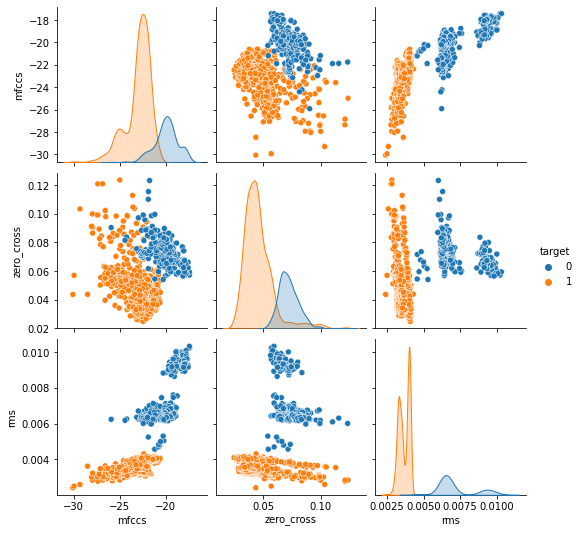

In [20]:
# Plot the features with indicating the target labels (normal - 1, abnormal - 0)
sns.pairplot(df_00, hue = 'target')

In [7]:
# Plotin 3D the features with indicating the target labels (normal - 1, abnomral - 0)
fig = px.scatter_3d(df_00 , x='mfccs', y='zero_cross', z='rms',
              color='target' , template = 'presentation', width=800, height=800)
fig.show()


In [8]:
df_00.drop(['machine_type'],axis = 1, inplace = True) 

c:\users\kasia\pyproj\machine-monitoring-conditions-unsupervised\my_env\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [9]:
df_00_features = df_00.iloc[:,:-1]

# Z-score normalisation

In [10]:
# z-score normalisation per machine
metrics_normalized_00 =(df_00_features-df_00_features.mean())/df_00_features.std()
metrics_normalized_00 = metrics_normalized_00.rename(columns={'mfccs': 'mfccs00_zscore','zero_cross': 'zero_cross00_zscore','rms': 'rms00_zscore'})

In [11]:
metrics_normalized_00.reset_index(drop=True, inplace = True)

# K means

In [12]:
# fit a kmeans object to the dataset - testing on both n_clusters=2 and n_clusters=3
kmeans = KMeans(n_clusters=3, init='k-means++').fit(metrics_normalized_00)

# clusters is an attribute of the object
cluster_centers = kmeans.cluster_centers_
# add cluster index to dataframe

cluster_labels = pd.Series(kmeans.labels_, name='cluster')
metrics_normalized_00_kmeans = metrics_normalized_00.join(cluster_labels.to_frame())
#metrics_normalized_00_kmeans = metrics_normalized_00.merge(cluster_labels, left_index = True, right_index = True)

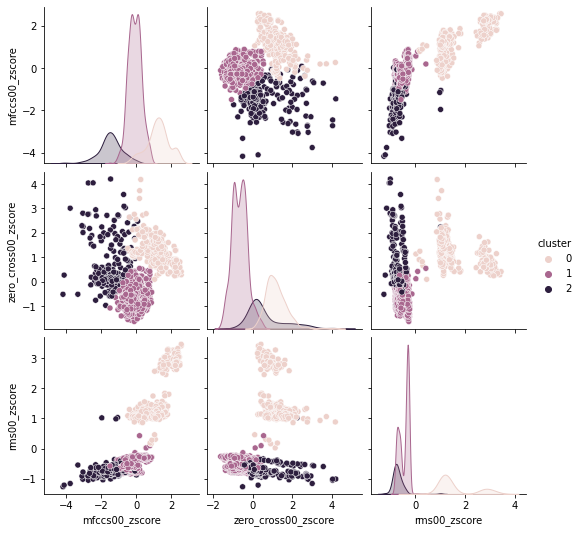

In [13]:
sns.pairplot(metrics_normalized_00_kmeans , hue="cluster")

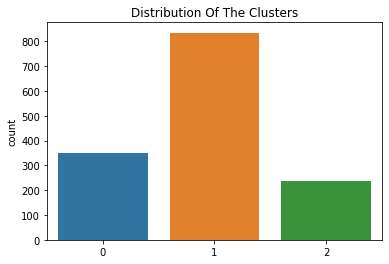

In [14]:
#Plotting countplot of clusters
pl = sns.countplot(x=kmeans.labels_)
pl.set_title("Distribution Of The Clusters")
plt.show()

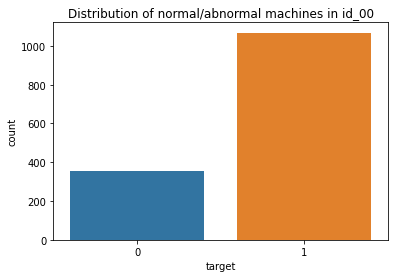

In [15]:
#Plotting countplot of normal/abnormal machines in id_00
pl = sns.countplot(x=df_00['target'])
pl.set_title("Distribution of normal/abnormal machines in id_00")
plt.show()

In [16]:
metrics_normalized_00_kmeans['target'] = df_00.target

In [17]:
# Show in 3D clusters (colors) as well as labels (symbols/shapes)
fig = px.scatter_3d(metrics_normalized_00_kmeans , x='mfccs00_zscore', y='zero_cross00_zscore', z='rms00_zscore',
              color=kmeans.labels_, symbol = 'target', template = 'presentation', width=800, height=800)
fig.show()

In [18]:
# Calculate correlation between kmeans clusters and labeled data 
correlation = abs(metrics_normalized_00_kmeans.target.corr(metrics_normalized_00_kmeans.cluster))

In [19]:
correlation

0.8110192718156238